In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical


Using TensorFlow backend.


In [2]:

os.chdir('../input/utkface_aligned_cropped')
os.chdir('UTKFace')


In [3]:
onlyfiles = os.listdir()

In [4]:
len(onlyfiles)

23708

In [5]:
shuffle(onlyfiles)
gender = [i.split('_')[1] for i in onlyfiles]

In [6]:
classes = []
for i in gender:
    i = int(i)
    classes.append(i)



In [7]:
X_data =[]
for file in onlyfiles:
    face = misc.imread(file)
    face = cv2.resize(face, (32, 32) )
    X_data.append(face)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
X = np.squeeze(X_data)

In [9]:
X.shape

(23708, 32, 32, 3)

In [10]:
# normalize data
X = X.astype('float32')
X /= 255


In [11]:
classes[:10]


[1, 0, 0, 0, 0, 1, 1, 1, 0, 1]

In [12]:
categorical_labels = to_categorical(classes, num_classes=2)


In [13]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])


In [14]:
len(x_train)+len(x_test) + len(x_valid) == len(X)


True

In [15]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)  

In [16]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [17]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=15,
         validation_data=(x_valid, y_valid),)

Train on 15008 samples, validate on 7000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
15008/15008 [==============================] - 20s 1ms/sample - loss: 0.5801 - acc: 0.6941 - val_loss: 0.4509 - val_acc: 0.7999
Epoch 2/15
15008/15008 [==============================] - 20s 1ms/sample - loss: 0.4407 - acc: 0.7983 - val_loss: 0.3710 - val_acc: 0.8399
Epoch 3/15
15008/15008 [==============================] - 20s 1ms/sample - loss: 0.3956 - acc: 0.8184 - val_loss: 0.3469 - val_acc: 0.8491
Epoch 4/15
15008/15008 [==============================] - 20s 1ms/sample - loss: 0.3702 - acc: 0.8318 - val_loss: 0.3294 - val_acc: 0.8576
Epoch 5/15
15008/15008 [==============================] - 20s 1ms/sample - loss: 0.3557 - acc: 0.8397 - val_loss: 0.3136 - val_acc: 0.8627
Epoch 6/15
15008/15008 [==============================] - 20s 1ms/sample - loss: 0.3438 - acc: 0.8478 - val_loss: 0.3063 - val_acc: 0.8649
Epoch 7/15
15008/15008 [==============================] - 20s 1ms/sam

In [18]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.87352943


In [19]:
labels =["Male",  # index 0
        "Female",      # index 1
        ]

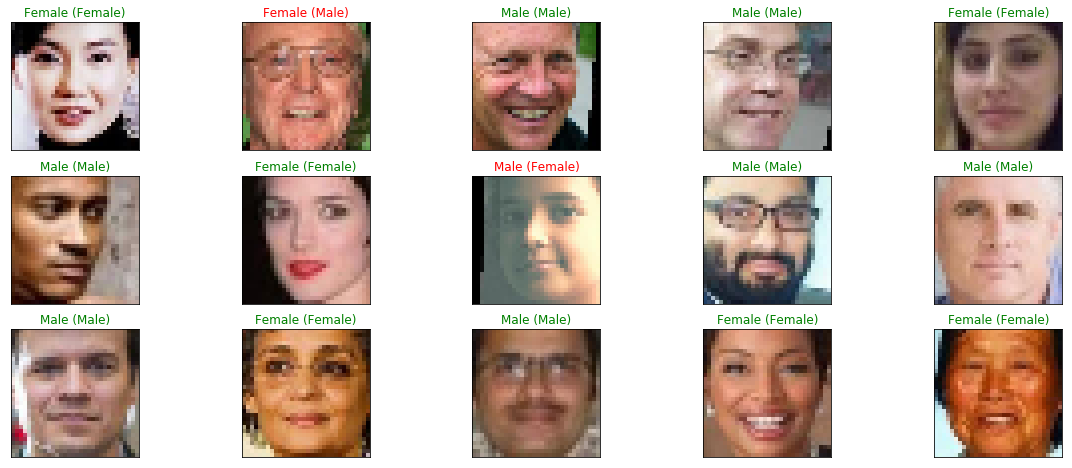

In [20]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()
